# Real Estate Price Analysis - EDA
Exploratory Data Analysis on a real dataset from Emlakjet (Istanbul).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

df = pd.read_csv("Real Estate in ISTANBUL (Emlakjet).csv")
df = df[["İl", "İlçe", "Mahalle", "Oda_Sayısı", "Brüt_Metrekare", "Binanın_Yaşı",
         "Bulunduğu_Kat", "Banyo_Sayısı", "Fiyatı"]].dropna()
df.columns = ["city", "district", "neighborhood", "number_of_rooms", "area_sqm",
              "building_age", "floor", "number_of_bathrooms", "price"]
df["room_numeric"] = df["number_of_rooms"].str.extract(r"(\d+)").astype(float)
df["number_of_bathrooms"] = pd.to_numeric(df["number_of_bathrooms"], errors="coerce")
df.dropna(inplace=True)

## Descriptive Statistics

In [2]:
df.describe()

,area_sqm,number_of_bathrooms,price,room_numeric
count,2860.000000,2860.000000,2.860000e+03,2860.000000
mean,151.172727,2.051049,4.833481e+06,2.723427
std,87.927417,20.087327,3.709431e+07,1.114035
min,35.000000,1.000000,1.690000e+05,1.000000
25%,100.000000,1.000000,8.687500e+05,2.000000
50%,130.000000,2.000000,1.625000e+06,3.000000
75%,180.000000,2.000000,3.700000e+06,3.000000
max,1100.000000,1075.000000,1.800000e+09,8.000000


## Correlation Matrix

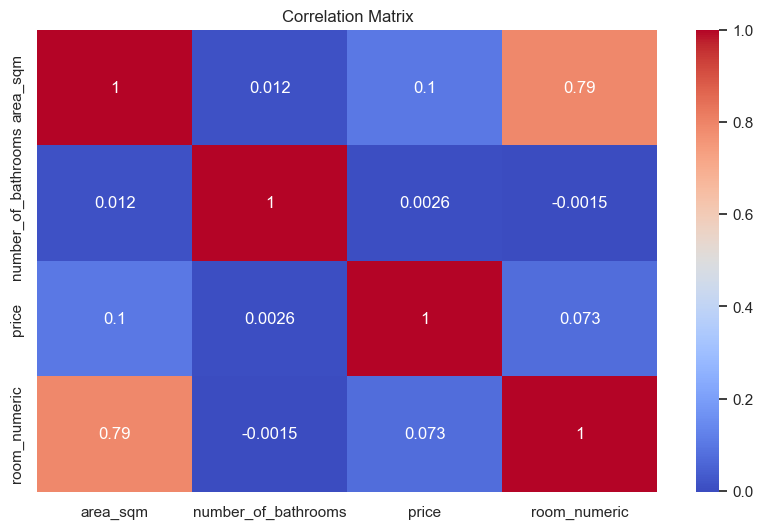

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Price Distribution

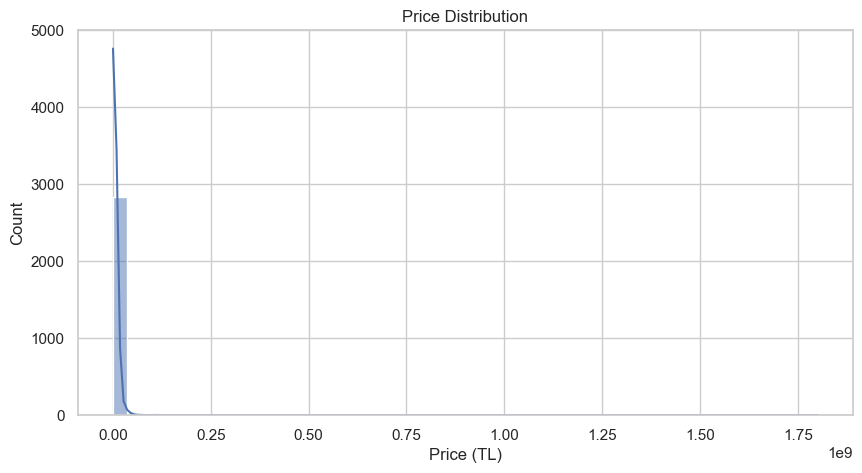

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (TL)")
plt.show()

## Average Price by Number of Rooms

C:\Users\durui\AppData\Local\Temp\ipykernel_14400\3100070842.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="number_of_rooms", y="price", estimator=np.mean, ci=None)


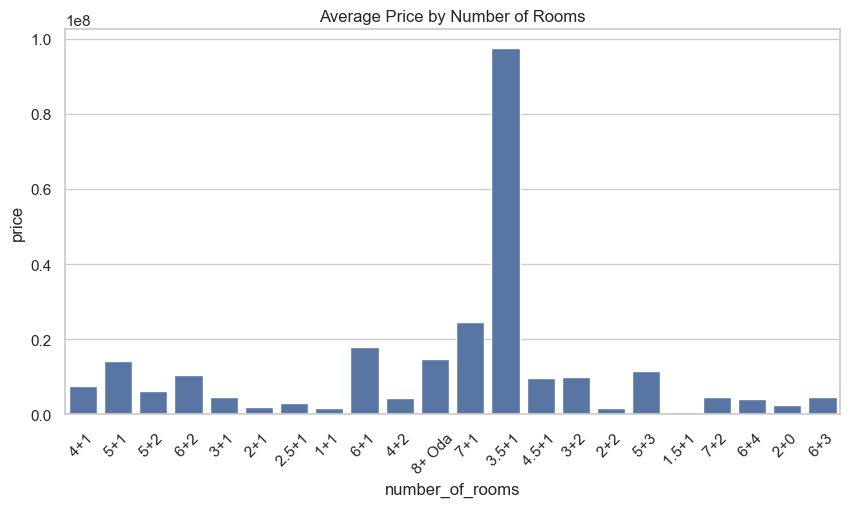

In [5]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="number_of_rooms", y="price", estimator=np.mean, ci=None)
plt.title("Average Price by Number of Rooms")
plt.xticks(rotation=45)
plt.show()

## Bonus: Average Price by City

C:\Users\durui\AppData\Local\Temp\ipykernel_14400\4116812767.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="city", y="price", estimator=np.mean, ci=None)


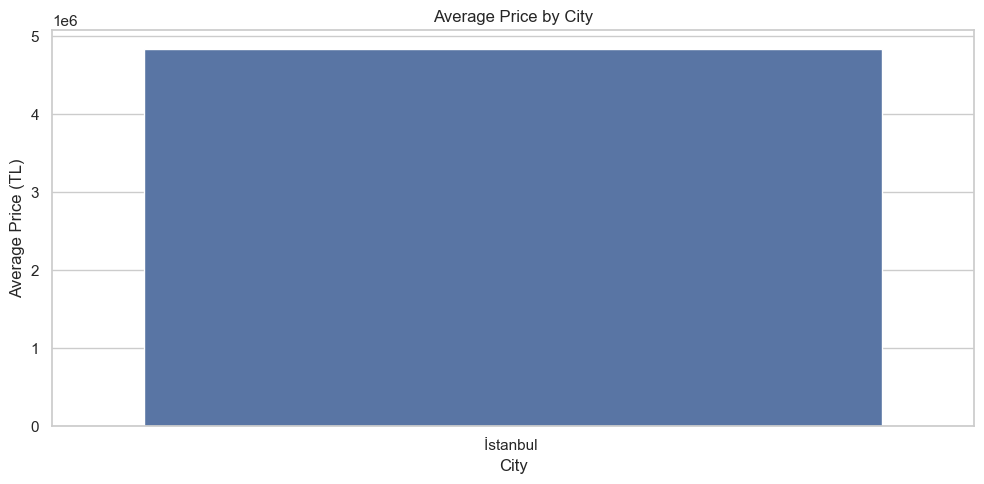

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="city", y="price", estimator=np.mean, errorbar=None)
plt.title("Average Price by City")
plt.xlabel("City")
plt.ylabel("Average Price (TL)")
plt.tight_layout()
plt.show()

## Bonus: Area vs Price (Scatter Plot)

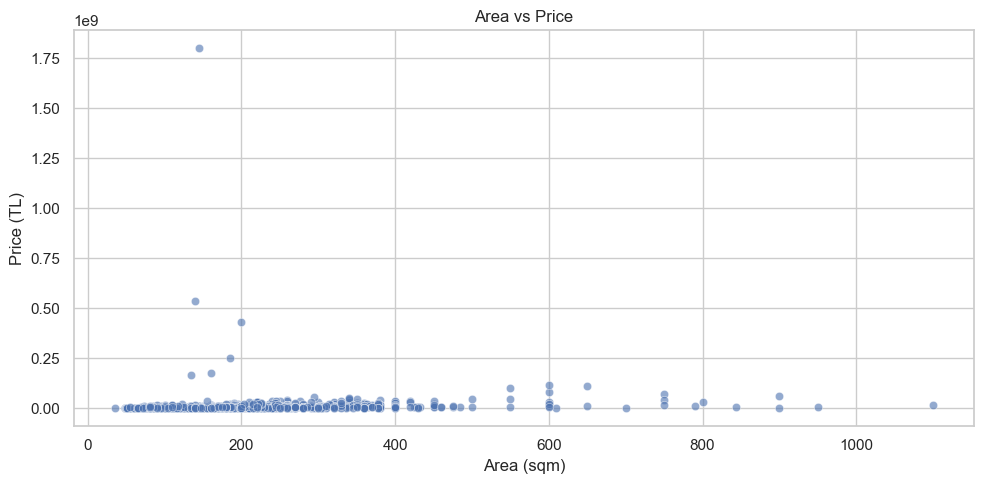

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="area_sqm", y="price", alpha=0.6)
plt.title("Area vs Price")
plt.xlabel("Area (sqm)")
plt.ylabel("Price (TL)")
plt.tight_layout()
plt.show()

## Bonus: Price by Number of Bathrooms (Boxplot)

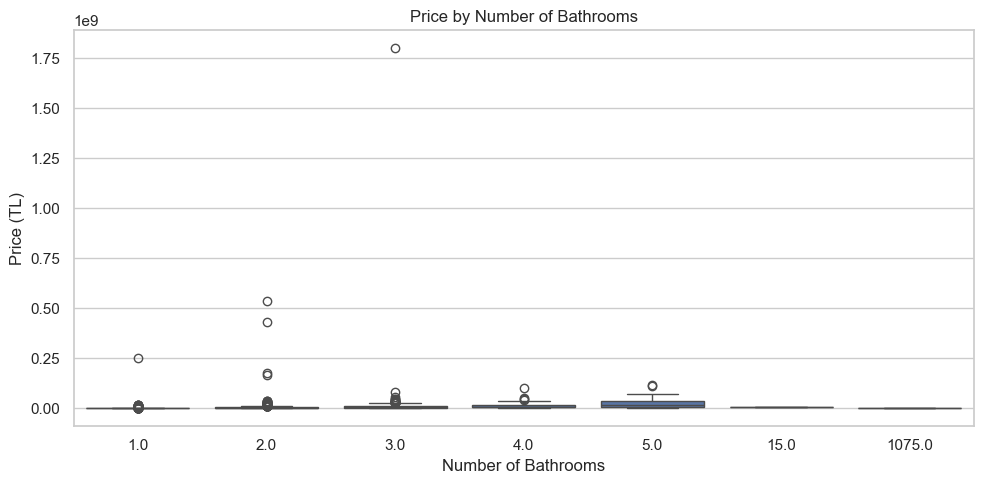

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="number_of_bathrooms", y="price")
plt.title("Price by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (TL)")
plt.tight_layout()
plt.show()

## Bonus: Building Age Distribution

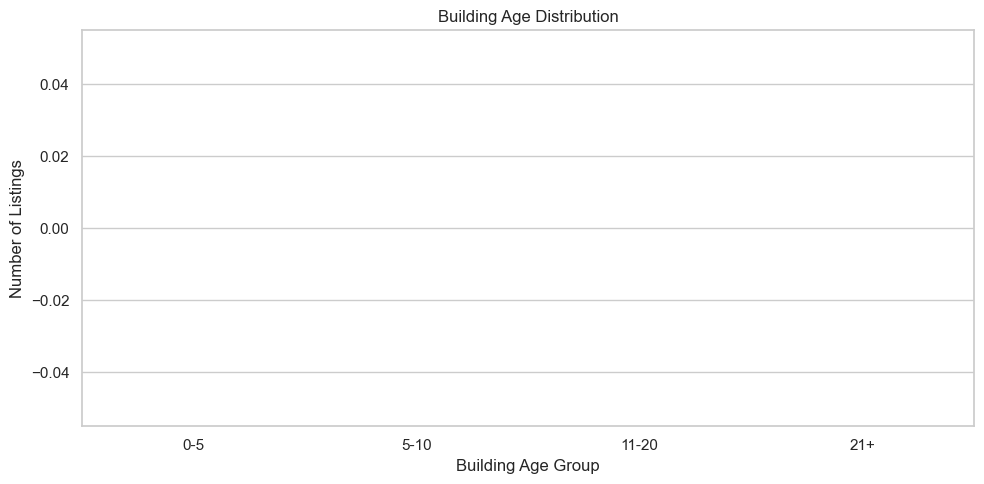

In [9]:
df["building_age_grouped"] = df["building_age"].replace({
    "0-1": "0-5", "2": "0-5", "3-4": "0-5", "5-10": "5-10",
    "11-15": "11-20", "16-20": "11-20", "21 Ve Üzeri": "21+"
})
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="building_age_grouped", order=["0-5", "5-10", "11-20", "21+"])
plt.title("Building Age Distribution")
plt.xlabel("Building Age Group")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()